**Multi-Agent Contorl**

The purpose of this library is to support different forms of multi-agent control.
The (current) focus is on setting with a single thread :  a single thread collects the actions to be performed by each agent (the joint actions) and performs it. 

The difference between the different approaches to control is in the agent that decides which action each agent performs. As can be seen in the image below, the two extreme cases are fully-centralized settings, in which a single agent (i.e. the controller) decide which agent each agent performs (think: dictatorship), and fully-decentralized settings, in which each agent makes its own decision on how to behave (think: anarchy). 


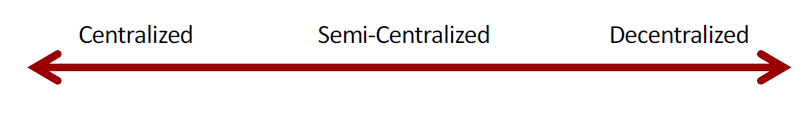

The framework is comprised of three main components: 

* **Control** supports the different approaches to control. It includes a single 
generic class named Controller that includes the thread that runs the systems, iteratively collects the joint actions from the agents, and executes them. The way joint actions are computed differs between the implementation of the sub-classes.
* **Agents** supports different AI approaches for decision making (e.g., planning, RL etc). It contains an Agent class that is initialized with the agent's DecisionMaker (that represents the decision making procedure that maps states to actions) and the sensor function of the agent that maps the current state of the world to the agent's observation of it. 
* **Environments** includes an interface class named env_wrapper to the environments in which the agents operate.



---

Let's install the Multi Agent Control (MAC) library as well as the Multi-Taxi environment, on which we will demonstrate the different control approaches. 




In [1]:
# don't need this with conda env
# !pip install git+https://github.com/sarah-keren/MAC
# !pip install git+https://github.com/sarah-keren/multi_taxi


Since the focus is on demonstrating the different control dynamics and not on the decision making process, we offer an example in which decision making is random - at each state a random action is selected. We will demonstrate this in a fully centralized and decentralized setting. Let's import the relevant clases. 


In [2]:
import sys
import numpy as np
from control.controller_decentralized import DecentralizedController
from control.controller_centralized import CentralizedController
from agents.agent import Agent, RandomDecisionMaker
from environments.env_wrapper import EnvWrappper


Now, let's create a multi-taxi environment and its MAC wrapper. 

In [3]:
from multi_taxi.taxi_environment import TaxiEnv
      
env = TaxiEnv(num_taxis=3)
# Make sure it works with our API:
env.agents = env.taxis_names
env.action_spaces = {
    agent_name: env.action_space for agent_name in env.agents
}
env.observation_spaces = {
    agent_name: env.observation_space for agent_name in env.agents
}
env.possible_agents = [agent for agent in env.agents]
needs_conv = False
       
environment = EnvWrappper(env, needs_conv=needs_conv)
print('EnvironmentWrapper created')



EnvironmentWrapper created


Let's examine two different approaches to control. The base class is common to both. 




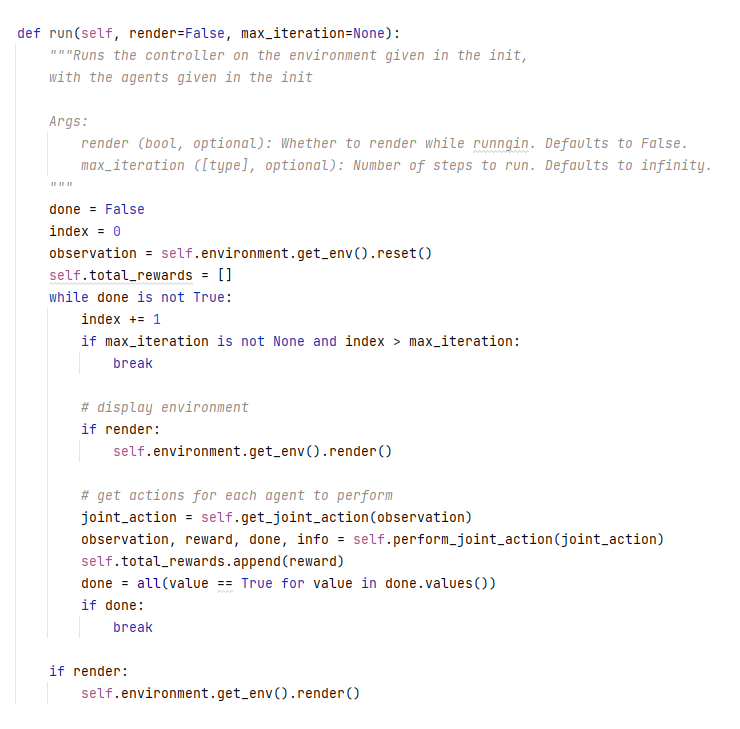

## Centralized Control

Let's create a cenrelized contorl setting, in which the decision making central agent chooses randomly the action each agent should perform. 


In [4]:
central_random_agent = Agent(RandomDecisionMaker(env.action_space))
env_agents = environment.get_env_agents()
env_agents_dict = {agent_name: None  for agent_name in env_agents}

This how joint actions are formed for the centeralized case

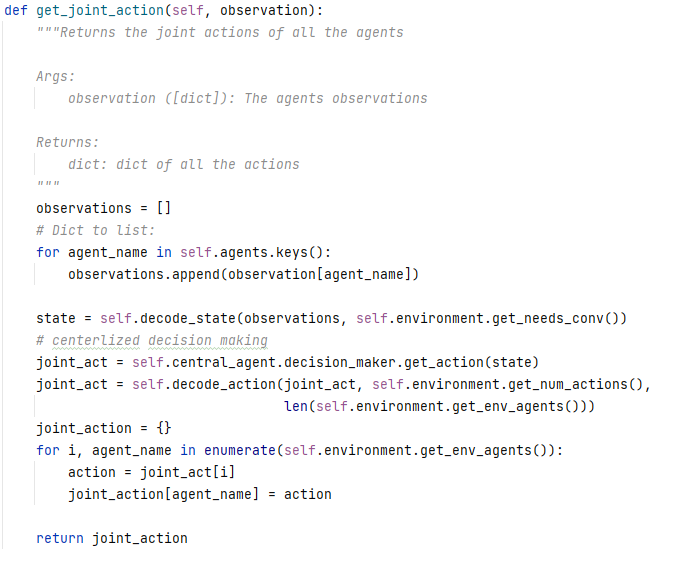

Now let's run the setting

In [5]:
controller = CentralizedController(environment, env_agents_dict, central_random_agent)
controller.run(render=True, max_iteration=10)


+-----------------------+
| :_|F: | : | : | : |F: |
| : | : : : | : | : | : |
| : : : : :D: : : : : : |
| : : : : : | :P: : : : |
| : : : : : | : : : : : |
| : : :_: : : : : : : : |
| | :G|_| | :G| | | : | |
+-----------------------+
Taxi0-YELLOW: Fuel: inf, Location: (0,1), Collided: False
Taxi1-RED: Fuel: inf, Location: (6,3), Collided: False
Taxi2-WHITE: Fuel: inf, Location: (5,3), Collided: False
Passenger1: Location: (3, 7), Destination: (2, 5)
Done: False, {'taxi_0': False, 'taxi_1': False, 'taxi_2': False, '__all__': False}
Passengers Status's: [2]
+-----------------------+
| : |F: | : | : | : |F: |
| :_| : : : | : | : | : |
| : : : : :D: : : : : : |
| : : : : : | :P: : : : |
| : : : : : | : : : : : |
| : : :_: : : : : : : : |
| | :G|_| | :G| | | : | |
+-----------------------+
Taxi0-YELLOW: Fuel: inf, Location: (1,1), Collided: False
Taxi1-RED: Fuel: inf, Location: (6,3), Collided: False
Taxi2-WHITE: Fuel: inf, Location: (5,3), Collided: False
Passenger1: Location: (3, 7), Dest

## Decentralized Control

Let's create a decenrelized contorl setting, in which each agent chooses randomly the action to perform. 



In [6]:
env_agents = environment.get_env_agents()
decentralized_agents = {agent_name: Agent(RandomDecisionMaker(env.action_space))
          for agent_name in env_agents}

Here, the action to perform is collected by each agent 

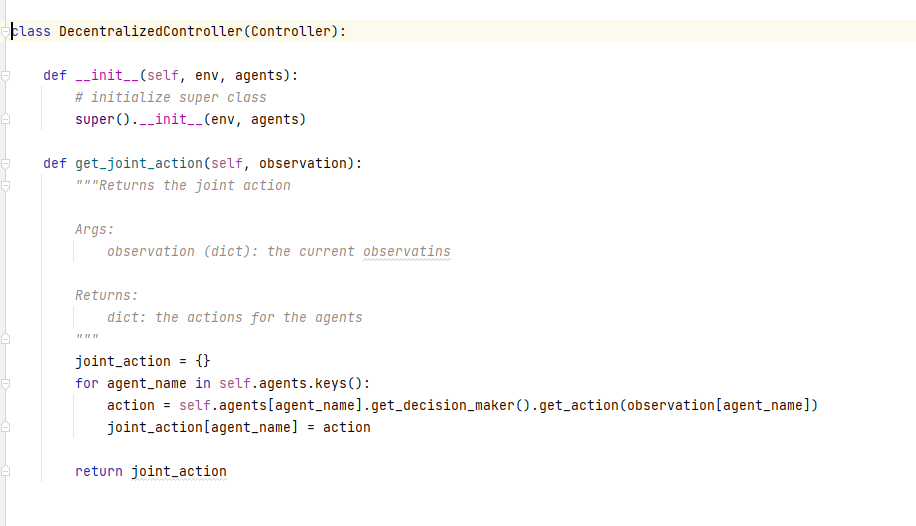

Let's run the code

In [7]:
controller = DecentralizedController(environment, decentralized_agents)
controller.run(render=True, max_iteration=10)

+-----------------------+
| : |F: | : | : |_: |D: |
| : | : : : | : | :P| : |
| : : : : : : : :_: : : |
| : : :_: : | : : : : : |
| : : : : : | : : : : : |
| : : : : : : : : : : : |
| | :G| | | :G| | | : | |
+-----------------------+
Taxi0-YELLOW: Fuel: inf, Location: (0,8), Collided: False
Taxi1-RED: Fuel: inf, Location: (3,3), Collided: False
Taxi2-WHITE: Fuel: inf, Location: (2,8), Collided: False
Passenger1: Location: (1, 9), Destination: (0, 10)
Done: False, {'taxi_0': False, 'taxi_1': False, 'taxi_2': False, '__all__': False}
Passengers Status's: [2]
+-----------------------+
| : |F: | : | : | : |D: |
| : | : : : | : |_:P| : |
| : : : : : : : : : : : |
| : : :_: : | : :_: : : |
| : : : : : | : : : : : |
| : : : : : : : : : : : |
| | :G| | | :G| | | : | |
+-----------------------+
Taxi0-YELLOW: Fuel: inf, Location: (1,8), Collided: False
Taxi1-RED: Fuel: inf, Location: (3,3), Collided: False
Taxi2-WHITE: Fuel: inf, Location: (3,8), Collided: False
Passenger1: Location: (1, 9), Des